In [430]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:95%}</style>"))

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Advertising Data

In [69]:
advertising = pd.read_csv('./data/Advertising.csv', index_col=0)
advertising.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [70]:
X = advertising[['TV', 'Radio', 'Newspaper']]
y = advertising['Sales']

In [73]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

X = sm.add_constant(X)

result = sm.OLS(y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           1.58e-96
Time:                        08:16:50   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
## Using smf ##########

results = smf.ols('Sales ~ TV + Radio + Newspaper', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           1.58e-96
Time:                        08:17:51   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual Sum of Squares(RSS) = $\sum_{i=1}^n (y_i - \hat y_i)^2$ 
## Total Sum of Squares (TSS) = $\sum_{i=1}^n (y_i - \bar y_i)^2$ 
## $R^2 = 1 - \frac{RSS}{TSS}$  
## Adj. $R^2 = 1 - \frac{RSS\big{/}(n-p-1)}{TSS\big{/}(n-1)}$ where p = no. of predictors, n = sample size

In [35]:
rss = np.sum(np.square(results.predict(X) - y))
tss = np.sum(np.square(y - y.mean()))

In [53]:
p=3
n=2000000
F = ((tss-rss)/p)/(rss/(n-p-1))
r2_score = (tss-rss)/tss
adj_r2 = 1 - (rss/(n-p-1))/(tss/(n-1))

In [54]:
F

5819077.1746702753

# Table 3.8

In [57]:
credit = pd.read_csv('./data/Credit.csv', index_col=0)
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [65]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

ethnicity = pd.get_dummies(credit['Ethnicity'])
X = ethnicity[['Asian','Caucasian']]
X = sm.add_constant(X)

y = credit['Balance']

result = sm.OLS(y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Thu, 07 Jun 2018   Prob (F-statistic):              0.957
Time:                        07:52:29   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        531.0000     46.319     11.464      0.000     439.939     622.061
Asian        -18.6863     65.021     -0.287      0.774    -146.515     109.142
Caucasian    -12.5025     56.681     -0.221      0.826    -123.935      98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interaction term

$Sales = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times TV \times Radio$

In [83]:
# Adding intraction term 
X['TV_n_Radio'] = X['TV'] * X['Radio']
X = X.drop('Newspaper', axis=1)
X.head()

,const,TV,Radio,TV_n_Radio
1,1.0,230.1,37.8,8697.78
2,1.0,44.5,39.3,1748.85
3,1.0,17.2,45.9,789.48
4,1.0,151.5,41.3,6256.95
5,1.0,180.8,10.8,1952.64


In [84]:
result = sm.OLS(y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 07 Jun 2018   Prob (F-statistic):          6.68e-146
Time:                        08:43:10   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV_n_Radio     0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
credit = pd.read_csv('./data/Credit.csv', index_col=0)
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [92]:
# from sklearn.preprocessing import LabelBinarizer
# lb = LabelBinarizer()
# student = lb.fit_transform(credit['Student'])



## Non-linear Relationships

In [100]:
auto = pd.read_csv('./data/Auto.csv', index_col=False)
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [113]:
def convert_float(x):
    try:
        return float(x)
    except ValueError:
        return None
    
auto['horsepower'] = auto['horsepower'].apply(convert_float)

In [115]:
auto.dropna(inplace=True)
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 10 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
horsepower1     392 non-null float64
dtypes: float64(5), int64(4), object(1)
memory usage: 33.7+ KB


In [148]:
X.head()

,const,horsepower,$horsepower^2$
0,1.0,130.0,16900.0
1,1.0,165.0,27225.0
2,1.0,150.0,22500.0
3,1.0,150.0,22500.0
4,1.0,140.0,19600.0


In [158]:
## Linear fit

X = auto[['horsepower']]
X = sm.add_constant(X)
y = auto['mpg'].values
lin_reg = sm.OLS(y, X).fit()
y_pred_lin = lin_reg.predict(X)

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           7.03e-81
Time:                        10:16:31   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [253]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
horsepower = poly.fit_transform(auto['horsepower'].values.reshape(-1,1))
X = pd.DataFrame(horsepower, columns=['const','horsepower','$horsepower^2$'])
y = auto['mpg'].values

poly_reg = sm.OLS(y, X).fit()


## Creating test data
X_test = poly.transform(np.linspace(0, 250, 251).reshape(-1,1))
y_pred_poly = poly_reg.predict(X_test)

poly_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           5.40e-99
Time:                        13:52:29   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             56.9001      1.800     31.604      0.000      53.360      60.440
horsepower        -0.4662      0.031    -14.978      0.000      -0.527      -0.405
$horsepower^2$     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(251,)

In [252]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
X = poly.fit_transform(auto['horsepower'].values.reshape(-1,1))
y = auto['mpg'].values
poly_reg5 = sm.OLS(y, X).fit()

## Creating test data
X_test = poly.transform(np.linspace(0, 250, 251).reshape(-1,1))
y_pred_poly5 = poly_reg5.predict(X_test)


poly_reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     177.4
Date:                Thu, 07 Jun 2018   Prob (F-statistic):           1.16e-97
Time:                        13:52:25   Log-Likelihood:                -1127.3
No. Observations:                 392   AIC:                             2267.
Df Residuals:                     386   BIC:                             2290.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -32.2306     28.574     -1.128      0.260     -88.411      23.950
x1             3.7001      1.303      2.840      0.005       1.139       6.262
x2            -0.0714      0.023     -3.170      0.002      -0.116      -0.027
x3             0.0006      0.000      3.206      0.001       0.000       0.001
x4         -2.281e-06   7.24e-07     -3.150      0.002   -3.71e-06   -8.57e-07
x5           3.33e-09   1.09e-09      3.068      0.002     1.2e-09    5.46e-09
==============================================================================
Omnibus:                       20.902   Durbin-Watson:                   1.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.260
Skew:                           0.305   Prob(JB):                     1.81e-09
Kurtosis:                       4.447   Cond. No.                     1.32e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [222]:
from importlib import reload
import sys
sys.path.insert(0,'/home/jkumar16/MyModules')
import ModelValidation as mv

# df_poly2 = mv.series_combiner([auto['horsepower'], y_pred_poly, y_pred_poly5], columns= ['horsepower', 'poly2', 'poly5'])
df_poly2 = mv.series_combiner([auto['horsepower'], y_pred_poly], columns= ['horsepower', 'poly2'])
#df_poly2 = df_poly2.sort_values('horsepower')
df_poly2.head()

,horsepower,poly2
0,130.0,17.091508
1,165.0,13.480156
2,150.0,14.658717
3,150.0,14.658717
4,140.0,15.752059


(7.1124116997792495, 48.487588300220743)

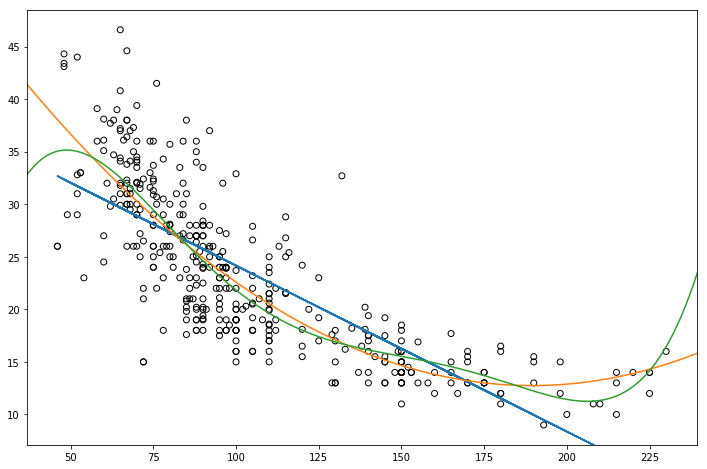

In [268]:
plt.figure(figsize=(12,8))
plt.scatter(auto['horsepower'], auto['mpg'], facecolor='None', edgecolor='k')

xlim = plt.xlim()
ylim = plt.ylim()

plt.plot(auto['horsepower'], y_pred_lin)
plt.plot(np.linspace(0, 250, 251), y_pred_poly)
plt.plot(np.linspace(0, 250, 251), y_pred_poly5)
plt.xlim(xlim[0], xlim[1])
plt.ylim(ylim[0], ylim[1])

## Figure 3.15

In [271]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [280]:
credit['Balance'].shape

(400,)

In [389]:
import statsmodels.api as sm

X = credit[['Limit', 'Age']]
X = sm.add_constant(X)
y = credit['Balance']

reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     595.0
Date:                Thu, 07 Jun 2018   Prob (F-statistic):          3.52e-120
Time:                        16:37:40   Log-Likelihood:                -2742.2
No. Observations:                 400   AIC:                             5490.
Df Residuals:                     397   BIC:                             5502.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -173.4109     43.828     -3.957      0.000    -259.576     -87.246
Limit          0.1734      0.005     34.496      0.000       0.163       0.183
Age           -2.2915      0.672     -3.407      0.001      -3.614      -0.969
==============================================================================
Omnibus:                       19.180   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.162
Skew:                           0.382   Prob(JB):                     1.26e-06
Kurtosis:                       4.022   Cond. No.                     2.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

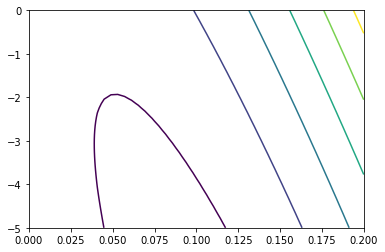

In [398]:
from sklearn.metrics import mean_squared_error

def get_msa(b0, b1, b2, data):
    y = b0 + b1*data['Limit'] + b2*data['Age']
    return mean_squared_error(data['Balance'], y)

b0 = -173.4109
b0 = 520.01499999999999
#b0 = 0
b1 = np.linspace(0, 0.2, 50)
b2 = np.linspace(-5, 0, 50)

X, Y = np.meshgrid(b1, b2)
Z = []

for b in np.vstack([X.ravel(), Y.ravel()]).T:
    Z.append(get_msa(b0, b[0], b[1], credit))

Z = np.array(Z).reshape(X.shape[0], X.shape[1])
plt.contour(X, Y, Z)

In [428]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

kf = KFold(n_splits=25)

X = credit[['Limit', 'Age']].values
y = credit['Balance'].values

b1 = []
b2 = []
msa = []

for train_index, test_index in kf.split(X):
    x = X[train_index]
    reg.fit(X[train_index], y[train_index])
    b1.append(reg.coef_[0])
    b2.append(reg.coef_[1])
    msa.append(mean_squared_error(y[train_index], reg.predict(X[train_index])))
    
b1 = np.array(b1)
b2 = np.array(b2)
msa = np.array(msa)

TypeError: Input z must be a 2D array.

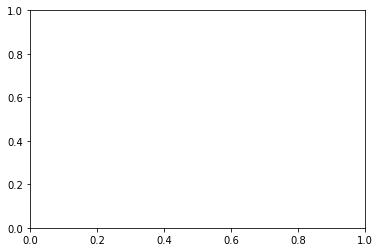

In [429]:
plt.contour(b1, b2, msa)

In [414]:
X[[0,1,2]]

array([[  1.00000000e+00,   3.60600000e+03,   3.40000000e+01],
       [  1.00000000e+00,   6.64500000e+03,   8.20000000e+01],
       [  1.00000000e+00,   7.07500000e+03,   7.10000000e+01]])